In [2]:


years = list(range(1994, 2022))

In [3]:
url_start = "https://www.pro-football-reference.com/years/{}/draft.htm"

In [4]:
import requests

for year in years:
    url = url_start.format(year)
    data = requests.get(url)
    
    with open("draft/{}.html".format(year), "w+") as f:
        f.write(data.text)

In [5]:
from bs4 import BeautifulSoup

In [6]:
import pandas as pd

In [7]:
dfs = []
for year in years:
    with open("draft/{}.html".format(year)) as f:
        page = f.read()
    soup = BeautifulSoup(page, "html.parser")
    soup.find('tr', class_='over_header').decompose()
    draft_table = soup.find(id='drafts')
    draft = pd.read_html(str(draft_table))[0]
    draft['Year'] = year
    
    dfs.append(draft)

In [8]:
drafts = pd.concat(dfs)

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
drafts.head()


,Rnd,Pick,Tm,Player,Pos,Age,To,AP1,PB,St,wAV,DrAV,G,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,TD.1,Rec,Yds.2,TD.2,Solo,Int.1,Sk,College/Univ,Unnamed: 28,Year
0,1,1,CIN,Dan Wilkinson,DT,21,2006,0,0,12,60,17,195,0,0,0,0,0,0,0,0,0,0,0,302,5,54.5,Ohio St.,College Stats,1994
1,1,2,IND,Marshall Faulk HOF,RB,21,2005,3,7,11,132,51,176,0,2,0,0,0,2836,12279,100,767,6875,36,NaN,NaN,NaN,San Diego St.,College Stats,1994
2,1,3,WAS,Heath Shuler,QB,22,1997,0,0,2,6,7,29,292,593,3691,15,33,67,198,1,0,0,0,NaN,NaN,NaN,Tennessee,College Stats,1994
3,1,4,NWE,Willie McGinest,DE,22,2008,0,2,13,76,68,212,0,0,0,0,0,0,0,0,0,0,0,581,5,86.0,USC,NaN,1994
4,1,5,IND,Trev Alberts,LB,24,1996,0,0,0,4,4,29,0,0,0,0,0,0,0,0,0,0,0,49,1,4.0,Nebraska,College Stats,1994


In [10]:
drafts = drafts[drafts['wAV'].notna()]
drafts = drafts.reset_index()

In [11]:
drafts = drafts[drafts['wAV'] != 'wAV']

In [12]:
drafts['wAV'] = drafts['wAV'].astype(float)

## Highest Average wAV values

In [13]:
colleges_means = drafts.groupby(by='College/Univ')['wAV'].mean()

In [14]:
colleges_means.sort_values(ascending=False).head()

College/Univ
Itawamba (MS)    70.00
West Alabama     66.00
Bloomsburg       57.00
Alcorn St.       52.25
Kutztown (PA)    52.00
Name: wAV, dtype: float64

## Highest Total wAV values

In [15]:
colleges_sums = drafts.groupby(by='College/Univ')['wAV'].sum()


In [16]:
colleges_sums = colleges_sums.sort_values(ascending=False)
colleges_sums.head()

College/Univ
Miami (FL)     3067.0
Ohio St.       3066.0
Florida St.    3028.0
LSU            2906.0
Georgia        2758.0
Name: wAV, dtype: float64

## Most players drafted

In [17]:
colleges_lengths = drafts.groupby(by='College/Univ').size()

In [18]:
colleges_lengths = colleges_lengths.sort_values(ascending=False)

In [19]:
import seaborn as sns

In [20]:
colleges_dict = {'Total wAV': colleges_sums, 'Total Players': colleges_lengths}
colleges_df = pd.DataFrame(colleges_dict)
colleges_df = colleges_df.loc[colleges_df['Total Players'] >= 5]
colleges_df['Average wAV'] = colleges_df['Total wAV'] / colleges_df['Total Players']
colleges_df.sort_values(by='Average wAV', ascending=False).head(10)

,Total wAV,Total Players,Average wAV
College/Univ,,,
Harvard,196.0,5,39.200000
Chattanooga,172.0,5,34.400000
Central Michigan,297.0,10,29.700000
Samford,136.0,5,27.200000
East. Michigan,235.0,9,26.111111
Western Illinois,182.0,7,26.000000
Boston Col.,1451.0,56,25.910714
Purdue,1258.0,50,25.160000
California,2040.0,82,24.878049


In [21]:
colleges_sums10 = colleges_sums[0:10]

Text(0.5, 1.0, 'Total wAV per school since 1994 (top 10)')

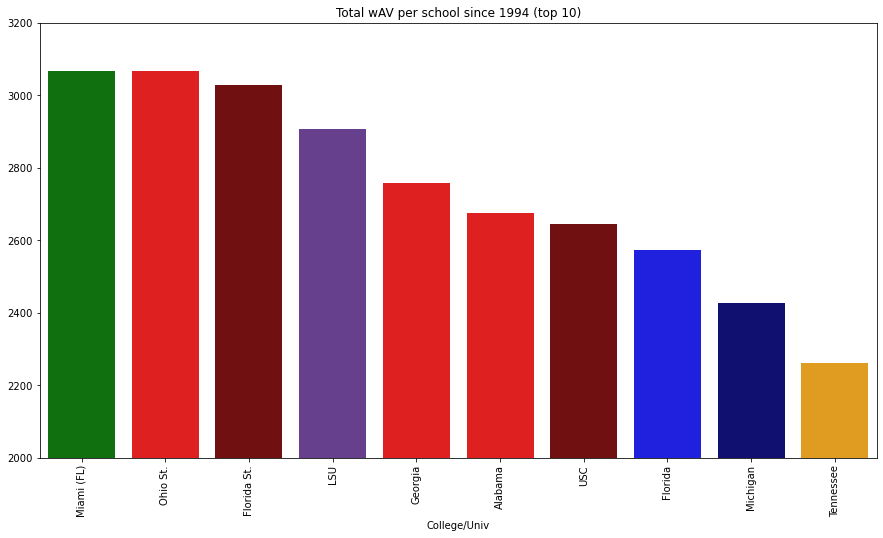

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.barplot(x=colleges_sums10.index, y=colleges_sums10.values, palette=['green', 'red', 'maroon', 'rebeccapurple', 'red', 'red', 'maroon', 'blue', 'navy', 'orange'])
plt.xticks(rotation=90)
plt.ylim(2000, 3200)
plt.title("Total wAV per school since 1994 (top 10)")

In [23]:
colleges_lengths10 = colleges_lengths[0:10]

Text(0.5, 1.0, 'Number of Players drafted by per school since 1994 (top 10)')

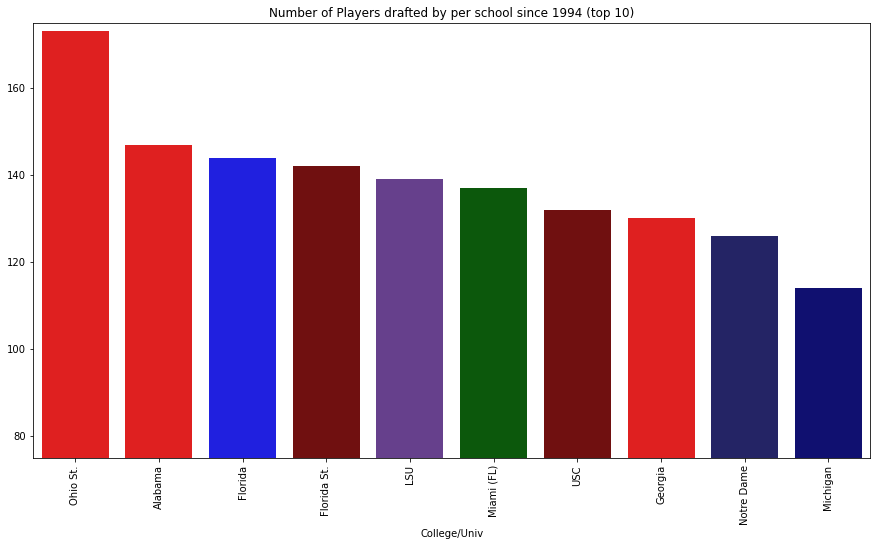

In [24]:
plt.figure(figsize=(15, 8))
sns.barplot(x=colleges_lengths10.index, y=colleges_lengths10.values, palette=['red', 'red', 'blue', 'maroon', 'rebeccapurple', 'darkgreen', 'maroon', 'red', 'midnightblue', 'navy'])
plt.xticks(rotation=90)
plt.ylim(75, 175)
plt.title("Number of Players drafted by per school since 1994 (top 10)")

In [25]:
pick_means = drafts.groupby(by='Pick')['wAV'].mean()

In [34]:
pick_means = pick_means.sort_values(ascending=False)
pick_means

Pick
1      65.285714
4      52.857143
2      50.892857
13     47.892857
6      46.285714
11     46.250000
12     46.071429
7      44.857143
3      44.785714
5      44.714286
24     42.428571
8      41.678571
9      41.214286
36     41.107143
19     40.964286
14     39.964286
21     39.071429
10     38.821429
18     38.642857
17     36.964286
16     35.750000
15     35.214286
20     34.071429
34     33.357143
28     33.107143
27     32.785714
32     32.178571
23     32.071429
33     32.000000
26     31.642857
30     30.357143
35     30.107143
42     29.607143
37     29.321429
46     29.285714
31     29.148148
25     29.142857
47     28.821429
55     27.607143
73     27.074074
44     26.964286
61     26.962963
22     26.250000
50     26.000000
64     25.925926
63     25.760000
109    25.142857
60     25.107143
71     25.107143
29     24.821429
39     24.714286
48     24.500000
65     24.444444
91     24.037037
38     23.928571
66     23.785714
43     23.607143
58     23.464286
78     23

In [33]:
pick_means10 = pick_means[0:10]

Pick
1     65.285714
4     52.857143
2     50.892857
13    47.892857
6     46.285714
11    46.250000
12    46.071429
7     44.857143
3     44.785714
5     44.714286
Name: wAV, dtype: float64

Text(0.5, 1.0, 'Mean wAV per Pick Number')

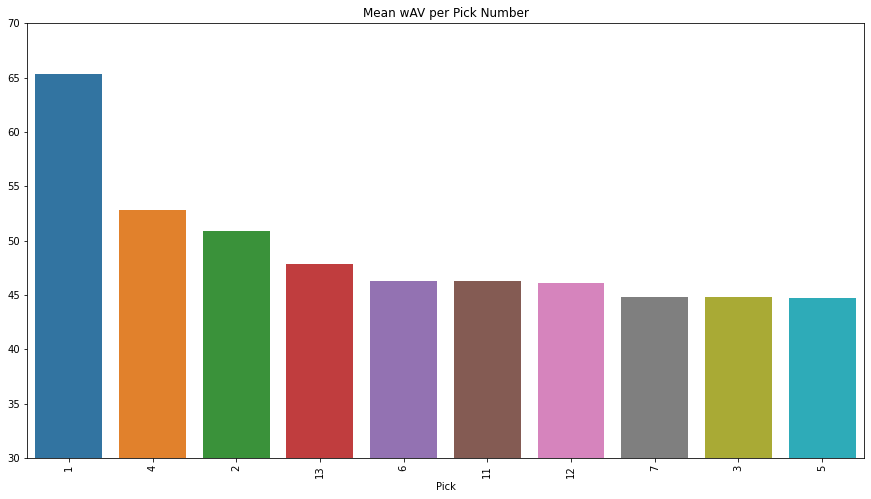

In [32]:
plt.figure(figsize=(15, 8))
sns.barplot(x=pick_means10.index, y=pick_means10.values)
plt.xticks(rotation=90)
plt.ylim(30, 70)
plt.title("Mean wAV per Pick Number")